### **주식 데이터 예측 모델링**

In [2]:
#  Finance-DataReader 패키지 설치

!pip install -U finance-datareader

In [49]:
# 크롤링을 위한 필요패키지 Import

import FinanceDataReader as fdr
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [10]:
# 네이버금융의 인기종목 크롤링, Return 값 : 인기검색 순위와 기업명을 Key, Value로 가진 Dictionary

def get_rank():
    web=requests.get("https://finance.naver.com/sise/lastsearch2.nhn")
    soup=BeautifulSoup(web.content,"html.parser")
    
    no_list=[]
    name_list=[]
    
    fi_rank={}

    num=soup.find_all(attrs={'class':'no'})

    for x in range(0,int(num[-1].text)):
        name_list.append(soup.select(".tltle")[x].get_text())
        no_list.append(int(soup.select(".no")[x].get_text()))
        fi_rank[no_list[x]]=name_list[x]
        
    return fi_rank

In [7]:
# get_rank() 함수로 부터 얻은 인기종목 Dictionary를 비교하여, 새로 등장했거나 순위가 5이상의 변동이 있는 종목 추출
# Return 값 : 이상치로 간주된 종목명 리스트

def get_outlier(old,new):
    outlier_list=[]
    
    old2={value:key for key, value in old.items()}
    new2={value:key for key, value in new.items()}
    
    
    for value in new.values():
        if value not in old.values():
            outlier_list.append(value)

    [outlier_list.append(k) for k in new2 if k in old2 and abs(old2[k]-new2[k])>=5]
    
    return outlier_list

In [25]:
# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,반채운 윤규선 이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [14]:
# 네이버금융 인기검색어 크롤1

old=get_rank()
old

{1: 'SK케미칼',
 2: '삼성전자',
 3: '씨젠',
 4: '에이치엘비',
 5: 'LG화학',
 6: '한국전력',
 7: 'SK디스커버리',
 8: '알루코',
 9: '셀트리온',
 10: '삼성생명',
 11: '카카오',
 12: '현대차',
 13: 'KODEX 200선물인버스2X',
 14: '삼성물산',
 15: '삼성전자우',
 16: 'SK하이닉스',
 17: '셀트리온헬스케어',
 18: '고려신용정보',
 19: 'NAVER',
 20: 'SK텔레콤',
 21: '유바이오로직스',
 22: '스페코',
 23: '삼성바이오로직스',
 24: '엑세스바이오',
 25: 'SK바이오팜',
 26: '리노공업',
 27: '신영증권우',
 28: '에이스테크',
 29: '일신바이오',
 30: 'LG전자'}

In [30]:
# old 와 비교하기위한 네이버금융 인기검색어 크롤2

new=get_rank()
new

{1: 'SK케미칼',
 2: '삼성전자',
 3: '알루코',
 4: '카카오',
 5: '에이치엘비',
 6: '씨젠',
 7: '삼성전자우',
 8: '현대차',
 9: 'SK하이닉스',
 10: '삼성생명',
 11: 'SK디스커버리',
 12: 'NAVER',
 13: 'SK텔레콤',
 14: 'KT&G',
 15: '이크레더블',
 16: '셀트리온',
 17: '엔씨소프트',
 18: '셀트리온헬스케어',
 19: 'LG화학',
 20: '삼성바이오로직스',
 21: '진매트릭스',
 22: '고려신용정보',
 23: '포스코케미칼',
 24: '신영증권우',
 25: '리노공업',
 26: '신풍제약',
 27: '스페코',
 28: '미래에셋대우2우B',
 29: '랩지노믹스',
 30: '에이텍'}

In [31]:
# 이상치로 간주되는, 순위의 변동이 5이상이거나 새로등장한 종목 리스트반환

outlier=get_outlier(old,new)
outlier

['KT&G',
 '이크레더블',
 '엔씨소프트',
 '진매트릭스',
 '포스코케미칼',
 '신풍제약',
 '미래에셋대우2우B',
 '랩지노믹스',
 '에이텍',
 '알루코',
 '카카오',
 '삼성전자우',
 'SK하이닉스',
 'NAVER',
 'SK텔레콤',
 '셀트리온',
 'LG화학',
 '스페코']

In [32]:
# Outlier 에 속한 기업의 종목코드 반환

outlier_code=[]

for i in range(0, len(outlier)):
  a=df_krx[df_krx['Name']==outlier[i]].reset_index()
  outlier_code.append(a['Symbol'][0])
  
outlier_code

['033780',
 '092130',
 '036570',
 '109820',
 '003670',
 '019170',
 '00680K',
 '084650',
 '045660',
 '001780',
 '035720',
 '005935',
 '000660',
 '035420',
 '017670',
 '068270',
 '051910',
 '013810']

In [273]:
# Outlier 에 해당되었던 종목의 주식데이터를 불러옴

stock=fdr.DataReader(outlier_code[0],'2010')

print('종목명 : '+outlier[0]+', 데이터 개수 : '+str(len(stock)))
print()

stock.head(10)

종목명 : KT&G, 데이터 개수 : 2621



,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,65100,65100,64500,64700,279064,0.004658
2010-01-05,65000,65100,63500,64000,874918,-0.010819
2010-01-06,64100,64200,63000,63100,810151,-0.014062
2010-01-07,63000,63100,62100,62600,805408,-0.007924
2010-01-08,62600,63300,62000,62300,573364,-0.004792
2010-01-11,62300,63600,62300,62300,779080,0.000000
2010-01-12,62400,63000,62300,62500,733236,0.003210
2010-01-13,62900,63700,62600,62600,674351,0.001600
2010-01-14,62700,63500,62400,62400,511403,-0.003195


In [396]:
# 종속변수 생성
mean_price=(stock['Open']+stock['High']+stock['Low']+stock['Close'])/4

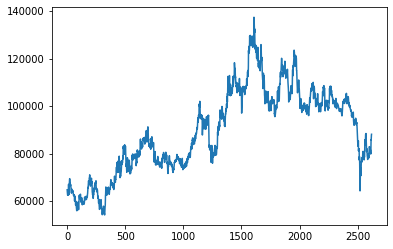

In [398]:
mean_price

stock['Price']=mean_price

stock['Price'].plot()

In [399]:
# 인덱스를 나누기위한 재정렬

stock=stock.reset_index()
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   2621 non-null   int64         
 1   Date    2621 non-null   datetime64[ns]
 2   Open    2621 non-null   int64         
 3   High    2621 non-null   int64         
 4   Low     2621 non-null   int64         
 5   Close   2621 non-null   int64         
 6   Volume  2621 non-null   int64         
 7   Change  2621 non-null   float64       
 8   price   2621 non-null   float64       
 9   Price   2621 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 204.9 KB


In [400]:
stock.head(6)

,index,Date,Open,High,Low,Close,Volume,Change,price,Price
0,0,2010-01-04,65100,65100,64500,64700,279064,0.004658,64850.0,64850.0
1,1,2010-01-05,65000,65100,63500,64000,874918,-0.010819,64400.0,64400.0
2,2,2010-01-06,64100,64200,63000,63100,810151,-0.014062,63600.0,63600.0
3,3,2010-01-07,63000,63100,62100,62600,805408,-0.007924,62700.0,62700.0
4,4,2010-01-08,62600,63300,62000,62300,573364,-0.004792,62550.0,62550.0
5,5,2010-01-11,62300,63600,62300,62300,779080,0.000000,62625.0,62625.0


In [401]:
stock.tail(6)

,index,Date,Open,High,Low,Close,Volume,Change,price,Price
2615,2615,2020-08-06,81600,86300,80600,86000,1395915,0.073658,83625.0,83625.0
2616,2616,2020-08-07,86500,87100,83600,86300,960954,0.003488,85875.0,85875.0
2617,2617,2020-08-10,85400,87000,84500,86200,526803,-0.001159,85775.0,85775.0
2618,2618,2020-08-11,85500,89100,85500,88100,719614,0.022042,87050.0,87050.0
2619,2619,2020-08-12,87700,88400,86700,88300,562328,0.002270,87775.0,87775.0
2620,2620,2020-08-13,87700,89500,87500,88000,649935,-0.003398,88175.0,88175.0


In [415]:
# 회귀모델 생성을 위한 패키지 Import

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [403]:
stocks=stock.copy()

In [404]:
# 일주일 후 예측
x=stocks.iloc[:len(stocks)-5]
y=stocks.iloc[5:]

print(len(x), len(y))

2616 2616


In [405]:
del x['Date']
del y['Date']

In [406]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, shuffle=False)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1831, 9) (785, 9) (1831, 9) (785, 9)


In [408]:
# 선형회귀모델

reg=LinearRegression()
reg.fit(train_x,train_y['Price'])
reg.score(train_x,train_y['Price'])

0.9804172664943394

In [409]:
predicted=reg.predict(test_x)
result=reg.score(test_y,predicted)

print("선형회귀모델 예측력 : "+ str(result))

선형회귀모델 예측력 : 0.926360258292962


In [412]:
# Ridge

# 알파값에 따른 score값 리스트 반환

def ridge_alpha(x,y,test_x,test_y):
  alpha_list=[100,10,1,0,0.1,0.05]
  
  for i in alpha_list:
    reg2=Ridge(alpha=i)
    reg2.fit(x,y)
    ridge_pred=reg2.predict(test_x)
    print('alpha='+str(i)+' : '+str(reg2.score(test_y,ridge_pred)))

ridge_alpha(train_x,train_y['Price'],test_x,test_y)

alpha=100 : 0.9257445974603525
alpha=10 : 0.9257543747317362
alpha=1 : 0.9258377132142561
alpha=0 : 0.9265211754582909
alpha=0.1 : 0.9261424142167466
alpha=0.05 : 0.9262285440087872


In [414]:
# Lasso

# 알파값에 따른 score값 리스트 반환

def lasso_alpha(x,y,test_x,test_y):
  alpha_list=[100,10,1,0,0.1,0.05]
  
  for i in alpha_list:
    reg3=Lasso(alpha=i)
    reg3.fit(x,y)
    lasso_pred=reg3.predict(test_x)
    print('alpha='+str(i)+' : '+str(reg3.score(test_y,lasso_pred)))

lasso_alpha(train_x,train_y['Price'],test_x,test_y)

alpha=100 : 0.9259639518198105
alpha=10 : 0.925959712408532
alpha=1 : 0.9252421795886572
alpha=0 : 0.924260850419262
alpha=0.1 : 0.9243668691161683
alpha=0.05 : 0.9243140787098183


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6001688503.774281, tolerance: 60956986.800382294
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6005520338.971345, tolerance: 60956986.800382294
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6073933654.421277, tolerance: 60956986.800382294
  positive)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sy

###**LinearRegression**  
0.926360258292962  
  

###**RidgeRegression**  
alpha=100 : 0.9257445974603525  
alpha=10 : 0.9257543747317362  
alpha=1 : 0.9258377132142561  
alpha=0 : 0.9265211754582909  
alpha=0.1 : 0.9261424142167466  
alpha=0.05 : 0.9262285440087872    

  
###**LassoRegression**  
alpha=100 : 0.9259639518198105  
alpha=10 : 0.925959712408532  
alpha=1 : 0.9252421795886572  
alpha=0 : 0.924260850419262  
alpha=0.1 : 0.9243668691161683  
 alpha=0.05 : 0.9243140787098183

